<a href="https://colab.research.google.com/github/pvnmahathi/FMML20210264-Labs/blob/main/Lab1_Features_FMML20210264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd
import seaborn as sns


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
eng1

'The giraffe (Giraffa) is an African artiodactyl mammal, the tallest living terrestrial animal and the largest ruminant.  It is traditionally considered to be one species, Giraffa camelopardalis, with nine subspecies. However, the existence of up to nine extant giraffe species has been described, based upon research into the mitochondrial and nuclear DNA, as well as morphological measurements of Giraffa. Seven other prehistoric species, known from fossils, are extinct.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its distinctive coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits and flowers of woody plants, primarily acacia species, which

In [ ]:
eng2

'Elephants are the largest existing land animals. Three living species are currently recognised: the African bush elephant, the African forest elephant, and the Asian elephant. They are an informal grouping within the family Elephantidae of the order Proboscidea. Elephantidae is the only surviving family of proboscideans; extinct members include the mastodons. Elephantidae also contains several extinct groups, including the mammoths and straight-tusked elephants. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears, and convex or level backs. Distinctive features of all elephants include a long proboscis called a trunk, tusks, large ear flaps, massive legs, and tough but sensitive skin. The trunk is used for breathing, bringing food and water to the mouth, and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant

In [ ]:
fr1

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.\nNeuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant la taxonomie des girafes est actuellement débattue parmi les scientifiques.\nL’espèce est considérée comme vulnérable par l'UICN : il y ava

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'Éléphant de savane d\'Afrique et l\'Éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« Éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'Éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

In [ ]:
print(fr1)

lagirafegiraffacamelopardalisestuneespcedemammifresongulsartiodactylesdugroupedesruminantsvivantdanslessavanesafricainesetrpanduedutchadjusquenafriquedusudsonnomcommunvientdelarabezarfahmaislanimalfutanciennementappelcamloparddulatincameloparduscontractiondecameluschameauenraisondulongcouetdeparduslopardenraisondestachesrecouvrantsoncorpsaprsdesmillionsdannesdvolutionlagirafeaacquisuneanatomieuniqueavecuncouparticulirementallongquiluipermetnotammentdebrouterhautdanslesarbresneufpopulationssediffrenciantparleursrobesetformesonttdcritesparlesnaturalistesdepuislexixesicleparfoiscommeespcespartentiremaisgnralementconsidrescommesimplessousespcesjusquauxxiesiclecependantlataxonomiedesgirafesestactuellementdbattueparmilesscientifiqueslespceestconsidrecommevulnrableparluicnilyavaitindividusenetilnyenaplusqueensoitunediminutionapprochantenanstymologielesubstantiffminingirafeestunempruntlitaliengiraffaluimmeempruntlarabezurfapourlarabeclassiquezarfadescriptionilsagitdelanimalactuelleplusgrandenh

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

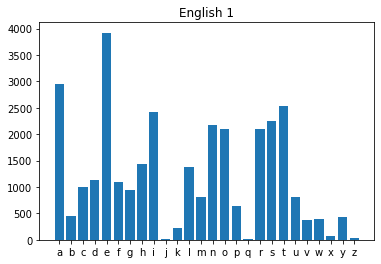

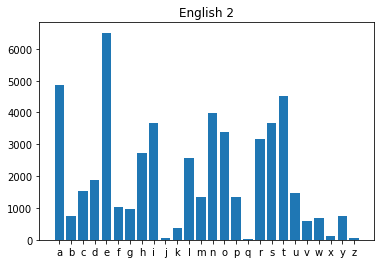

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

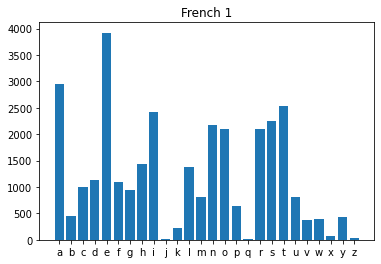

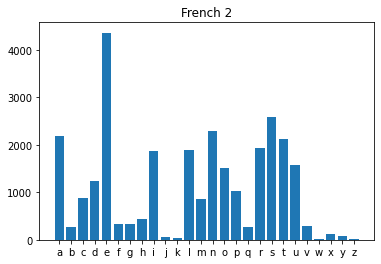

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

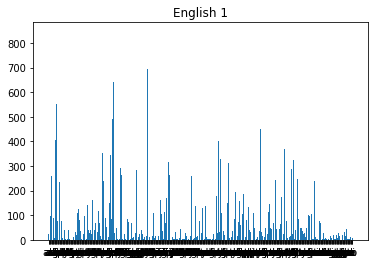

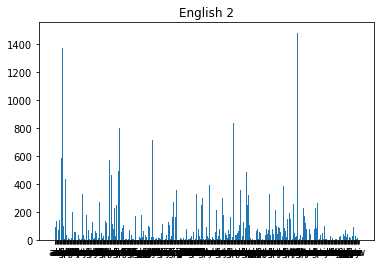

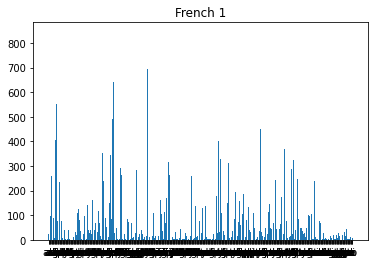

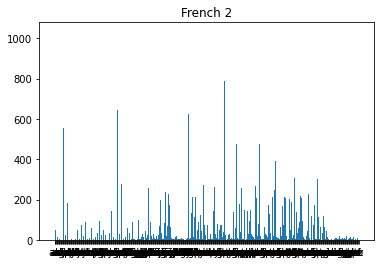

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))

plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

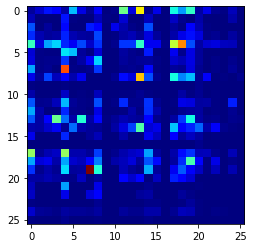

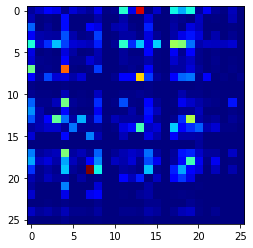

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

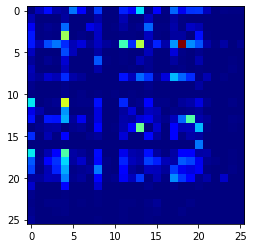

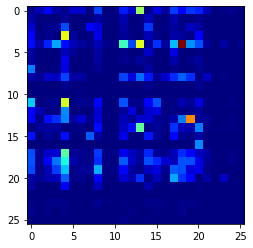

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Visualizing n-grams for various values of n and by taking top 10 n-grams in each case

In [ ]:
####10 Most Common n-grams of length 6 in eng1
ngram_eng1 = Counter(ngrams(eng1,6))
ngram_eng1.most_common(10)

[(('g', 'i', 'r', 'a', 'f', 'f'), 226),
 (('i', 'r', 'a', 'f', 'f', 'e'), 199),
 (('r', 'a', 'f', 'f', 'e', 's'), 119),
 (('e', 'g', 'i', 'r', 'a', 'f'), 77),
 (('t', 'h', 'e', 'g', 'i', 'r'), 51),
 (('h', 'e', 'g', 'i', 'r', 'a'), 51),
 (('s', 'p', 'e', 'c', 'i', 'e'), 38),
 (('p', 'e', 'c', 'i', 'e', 's'), 38),
 (('i', 'n', 'g', 't', 'h', 'e'), 38),
 (('f', 'e', 'm', 'a', 'l', 'e'), 31)]

In [ ]:
####10 Most Common n-grams of length 6 in eng2
ngram_eng2 = Counter(ngrams(eng2,6))
ngram_eng2.most_common(10)

[(('e', 'l', 'e', 'p', 'h', 'a'), 337),
 (('l', 'e', 'p', 'h', 'a', 'n'), 326),
 (('e', 'p', 'h', 'a', 'n', 't'), 326),
 (('p', 'h', 'a', 'n', 't', 's'), 226),
 (('n', 'e', 'l', 'e', 'p', 'h'), 94),
 (('a', 'f', 'r', 'i', 'c', 'a'), 78),
 (('a', 'n', 'e', 'l', 'e', 'p'), 78),
 (('h', 'a', 'n', 't', 's', 'a'), 60),
 (('e', 'e', 'l', 'e', 'p', 'h'), 56),
 (('i', 'n', 'g', 't', 'h', 'e'), 53)]

In [ ]:
####10 Most Common n-grams of length 6 in fr1
ngram_fr1 = Counter(ngrams(fr1,6))
ngram_fr1.most_common(10)

[(('g', 'i', 'r', 'a', 'f', 'e'), 98),
 (('a', 'g', 'i', 'r', 'a', 'f'), 49),
 (('l', 'a', 'g', 'i', 'r', 'a'), 48),
 (('e', 'g', 'i', 'r', 'a', 'f'), 33),
 (('i', 'r', 'a', 'f', 'e', 's'), 28),
 (('s', 'g', 'i', 'r', 'a', 'f'), 23),
 (('e', 'l', 'a', 'g', 'i', 'r'), 23),
 (('e', 's', 'g', 'i', 'r', 'a'), 21),
 (('i', 'r', 'a', 'f', 'e', 'd'), 21),
 (('l', 'o', 'p', 'a', 'r', 'd'), 18)]

In [ ]:
####10 Most Common n-grams of length 6 in fr2
ngram_fr2 = Counter(ngrams(fr2,6))
ngram_fr2.most_common(10)

[(('l', 'p', 'h', 'a', 'n', 't'), 193),
 (('l', 'l', 'p', 'h', 'a', 'n'), 85),
 (('p', 'h', 'a', 'n', 't', 's'), 73),
 (('s', 'l', 'p', 'h', 'a', 'n'), 55),
 (('e', 's', 'l', 'p', 'h', 'a'), 52),
 (('e', 'l', 'l', 'p', 'h', 'a'), 48),
 (('p', 'h', 'a', 'n', 't', 'e'), 34),
 (('l', 'e', 's', 'l', 'p', 'h'), 32),
 (('d', 'f', 'e', 'n', 's', 'e'), 31),
 (('d', 'e', 'l', 'l', 'p', 'h'), 28)]

We can observe that as the value of n increases, the similarity across different languages for same topic increases and similarity across different topics of same language decreases. Hence in this case bigrams of the text could be good features for comparision.

Let us look at the top 10 ngrams for each text. 

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1028.0
('n', 't') : 786.0
('d', 'e') : 655.0
('e', 'n') : 646.0
('l', 'e') : 623.0
('a', 'n') : 553.0
('o', 'n') : 478.0
('r', 'e') : 477.0
('e', 'l') : 437.0
('s', 'e') : 390.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

1. Worked on different languages and using different topics.

   Higher order n-gram is a good feature distinguishing topics of a language but not for disinguishing languages

3. In this case I have visualized the trigrams and higher n-grams by displaying most common top 10 n-grams from all the scenarios and comparing them. We can observe that as the value of n increases, the similarity across different languages for same topic increases and similarity across different topics of same language decreases. Hence in this case bigrams of the text could be good features for comparision.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==0,:,:]
no0 = train_X[train_y==1,:,:]
no2 = train_X[train_y==6,:,:]
no3 = train_X[train_y==9,:,:]

Let us visualize a few images here:

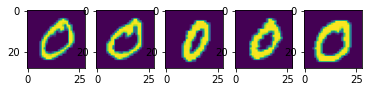

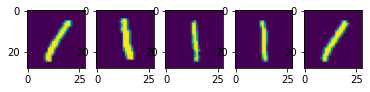

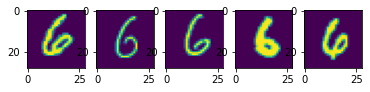

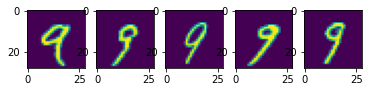

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

the sum of all pixels for the classes '0' and '1'

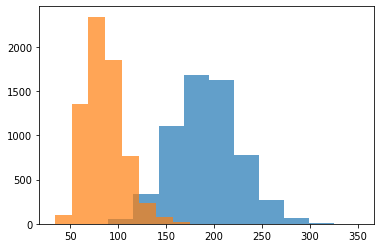

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

the sum of all pixels for the classes '6' and '9'

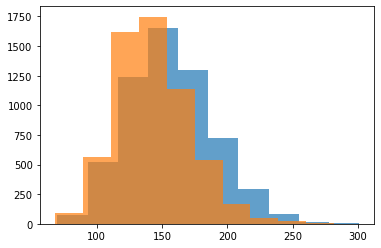

In [ ]:
plt.hist(sum2, alpha=0.7);
plt.hist(sum3, alpha=0.7);

the sum of all pixels for the classes '0', '1', '6', '9'

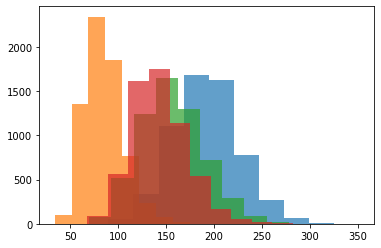

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);
plt.hist(sum3, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

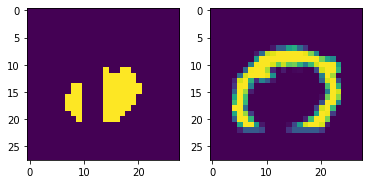

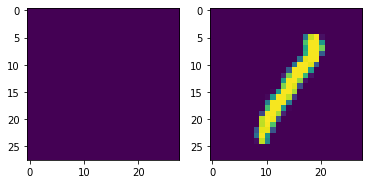

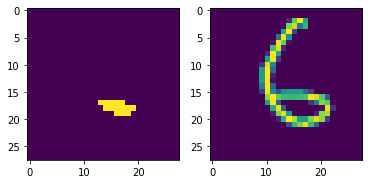

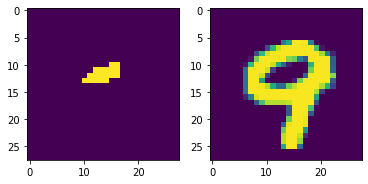

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

plot of number of hole pixels for the classes '0' and '1'

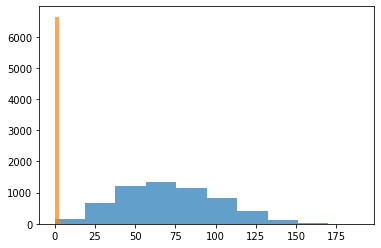

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

plot of number of hole pixels for the classes '6' and '9'

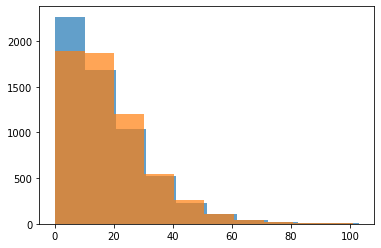

In [ ]:
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])

plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);

The above plot of '6' and '9' almost overlaps. It makes the differentiation difficult

plot of number of hole pixels for the classes '0', '1', '6', '9'

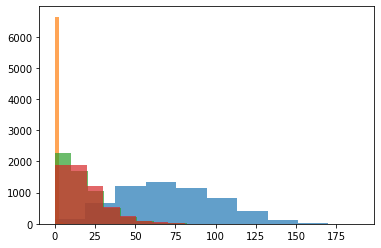

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


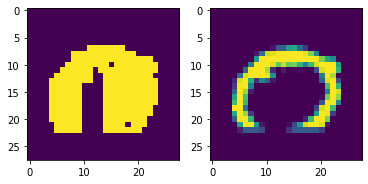

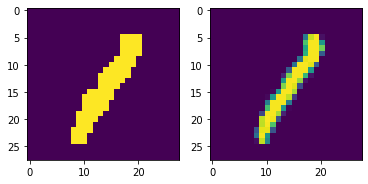

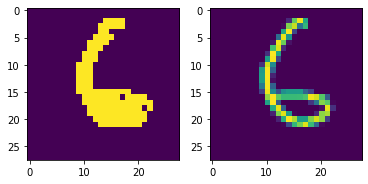

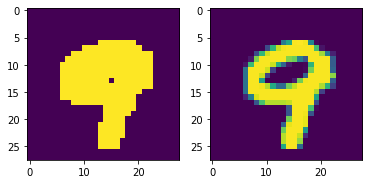

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit '0' and '1'

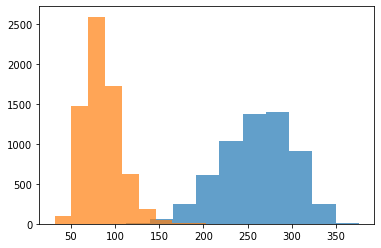

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Plotting the number of hull pixels versus the digit '6' and '9'

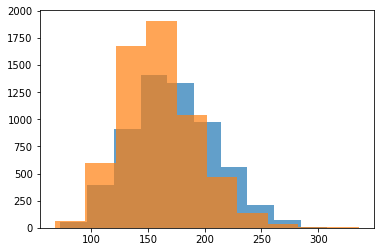

In [ ]:
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])

plt.hist(hull2, alpha=0.7);
plt.hist(hull3, alpha=0.7);

We can observe that in case of 6 and 9 the two histograms overlap and it makes difficult to visualize and differentiate

Plotting the number of hull pixels versus the digit '0', '1', '6', '9'

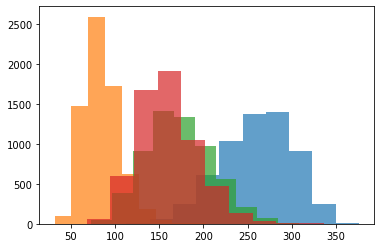

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha=0.7);
plt.hist(hull3, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

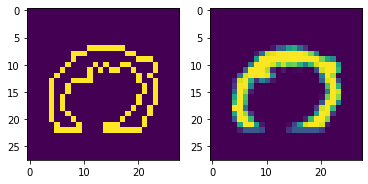

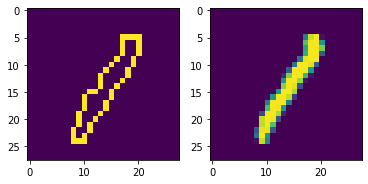

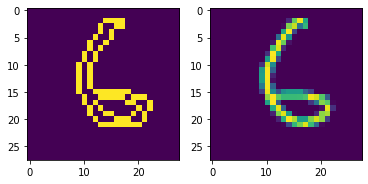

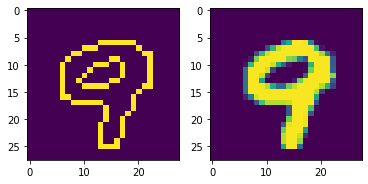

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:], no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting number of boundary pixels for first two classes '0' and '1'

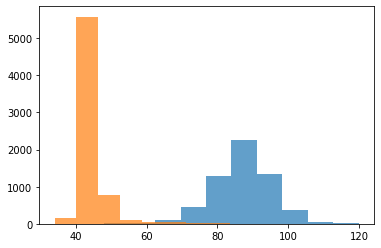

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);


Plotting number of boundary pixels for first two classes '6' and '9'

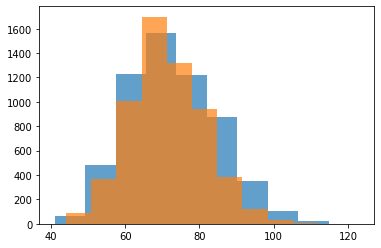

In [ ]:
bound2= np.array([getBoundaryPixels(i).sum() for i in no2])
bound3= np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);

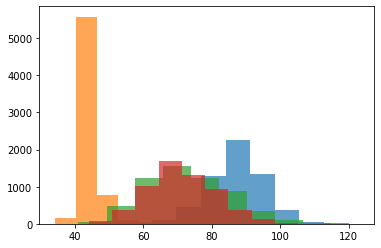

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound2= np.array([getBoundaryPixels(i).sum() for i in no2])
bound3= np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);

What will happen if we plot two features together? 

Plotting two features for class 0 = 0 and class 1 = 1

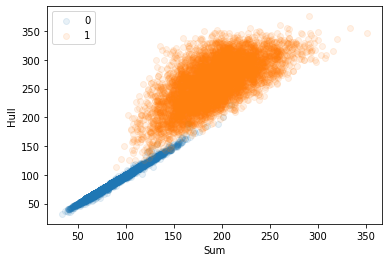

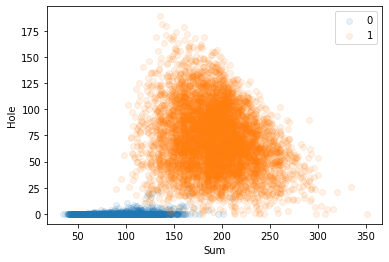

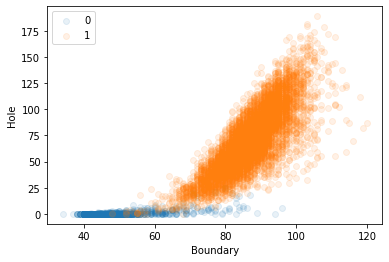

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Plotting two features for class 2 = 6 and class 3 = 9

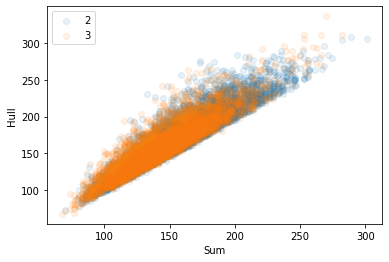

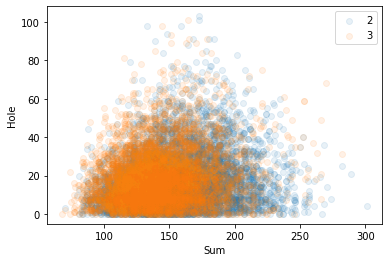

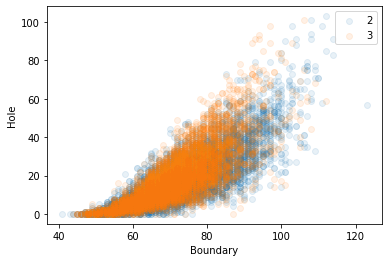

In [ ]:
# Sum and hull

plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum3, hull3, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['2','3'])
plt.show()

# Sum and hole

plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['2','3'])
plt.show()

# Hole and boundary

plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['2','3'])
plt.show()

Plotting two features for all the four classes considered above

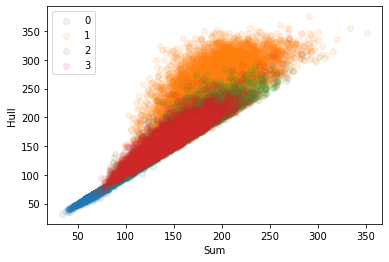

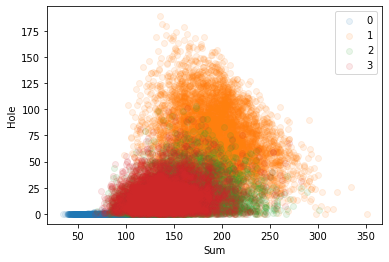

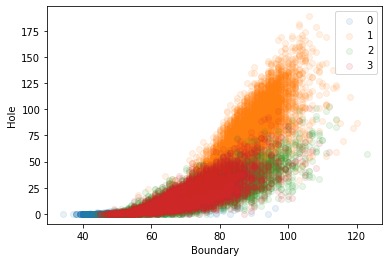

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum3, hull3, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1','2','3'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1','2','3'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1','2','3'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 2']*len(sum2)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole2)), np.concatenate((sum1,sum2)), 
                           np.concatenate((bound1,bound2)), np.concatenate((cl1, cl2)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Plotting three features for all the four classes together

In [ ]:


cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
cl2 = ['class 2']*len(sum2)
cl3 = ['class 3']*len(sum3)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0, hole2, hole3)), np.concatenate((sum1,sum0, sum2, sum3)), np.concatenate((hull1, hull0, hull2, hull3)),
                           np.concatenate((bound1,bound0, bound2, bound3)), np.concatenate((cl1, cl0, cl2, cl3)))),
               columns =['Hole', 'Sum','Hull', 'Boundary', 'Class'])
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

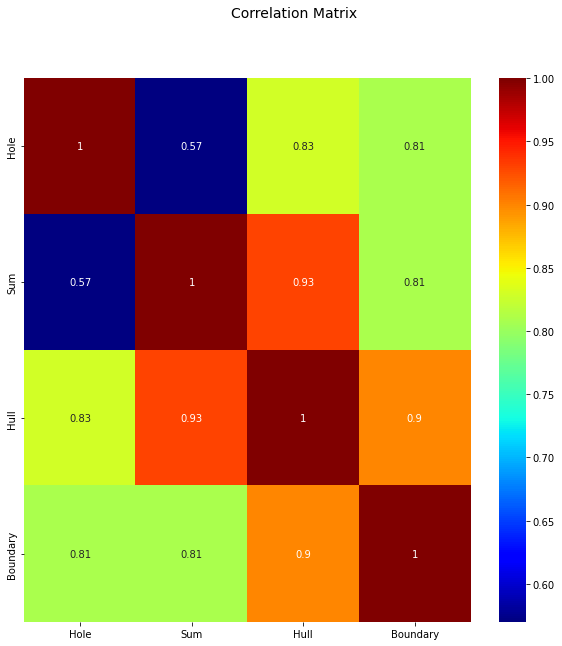

In [ ]:
####Correlation heatmap for the four features considered above(Hole, Sum, Boundary, Hull)

mat, ax = plt.subplots(figsize=(10, 10))
correlation = df.corr()
correlation_matrix = sns.heatmap(round(correlation,2), annot=True, ax=ax, cmap="jet")
t= mat.suptitle('Correlation Matrix', fontsize=14)

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. According to me the combination of sum, hole and boundary would be a best feature combination. This can be inferred by plotting 3D scatter plot by taking more than two classes into consideration. This combination of features helps us to distinguish the classes in case of more than two classes in combination where other combination of features work only to some extent. The combination of features can also be inferred from correlation matrix. The features with less correlation can be taken as good combination of features. I have plotted a correlation matrizx for all the four features above. We can see that the features sum, boundary and hull have less correlation compared to other features.

2. The data with four or more features can be visualized using a combination of 3D representation and heatmaps. The three dimensions indicate the three features and the color intensity of the scatter plot in the form of heatmap indicates the fourth dimension

3. One of the features which I can come up with is number of white pixels surrounded by black pixels on three sides, which means a pointed corner. For example in 6 we can have one or atmost two such points(due to hand writing). Similarly in one we can have two such points. But this feature has the same drawbacks as of the above few features.

   Other feature could be distance between start and end points of the digit. It is minimum in case of zero and eight as start and end points are same in these cases

4. No. For example, if we consider two classes 6 and 9(shown above for class 2 and class 3 while plotting) or classes 4 and 7 in which the number of boundary pixels, hull pixels, hole pixels are more or less same, it would be difficult to distinguish between such kind of classes 

5. We can come up with more than two classes at a time. However, the visualization would become difficult to interpret as we can see in above cases where I have taken four classes into consideration as shown in the cells added above